In [28]:
# Import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
# Read files into DataFrame
path_conflict = Path("Resources/conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("Resources/net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("Resources/population(1).csv")
population_df = pd.read_csv(path_population)

In [3]:
# Preview Data Sets
conflict_df.head()
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [4]:
migration_df.head()

,Country name,Year,Net migration
0,Afghanistan,1950,6161.0
1,Afghanistan,1951,4903.0
2,Afghanistan,1952,145.0
3,Afghanistan,1953,-8867.0
4,Afghanistan,1954,-6837.0


In [5]:
population_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [6]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [7]:
# Check info on all the dfs
conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              6970 non-null   object
 1   Code                6970 non-null   object
 2   Year                6970 non-null   int64 
 3   One-sided violence  6970 non-null   int64 
 4   Non-state           6970 non-null   int64 
 5   Intrastate          6970 non-null   int64 
 6   Interstate          6970 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 381.3+ KB


In [8]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

In [9]:
migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country name   18360 non-null  object 
 1   Year           18360 non-null  int64  
 2   Net migration  18360 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 430.4+ KB


In [10]:
conflict_df.head()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0


In [11]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [12]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [13]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [14]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0.0,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN


In [15]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0.0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN,NaN


In [16]:
# Remove any NaNs from the dataset.
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,AFG,1989,5411.0,2683.0,10673172.0
74,Afghanistan,AFG,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,AFG,1991,3553.0,39926.0,10745168.0
76,Afghanistan,AFG,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,AFG,1993,4097.0,1171818.0,14003764.0


In [17]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,1989,5411.0,2683.0,10673172.0
74,Afghanistan,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,1991,3553.0,39926.0,10745168.0
76,Afghanistan,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [18]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [20]:
# Remove all countries except for one
country_name = "Syria"
one_country_df = merged_df[merged_df['Country name'] == country_name]
one_country_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
5676,Syria,1989,1.0,-12471.0,12034101.0
5677,Syria,1990,0.0,-12182.0,12409003.0
5678,Syria,1991,0.0,-11960.0,12782284.0
5679,Syria,1992,0.0,-11272.0,13156408.0
5680,Syria,1993,0.0,-11553.0,13537067.0


In [21]:
# Reset Index
one_country_df.reset_index(drop=True, inplace=True)
one_country_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Syria,1989,1.0,-12471.0,12034101.0
1,Syria,1990,0.0,-12182.0,12409003.0
2,Syria,1991,0.0,-11960.0,12782284.0
3,Syria,1992,0.0,-11272.0,13156408.0
4,Syria,1993,0.0,-11553.0,13537067.0


In [25]:
one_country_df

,Year,total_conflict_deaths,Net migration,Population
0,1989,1.0,-12471.000,12034101.0
1,1990,0.0,-12182.000,12409003.0
2,1991,0.0,-11960.000,12782284.0
3,1992,0.0,-11272.000,13156408.0
4,1993,0.0,-11553.000,13537067.0
5,1994,0.0,-18146.000,13922629.0
6,1995,0.0,-13569.000,14313451.0
7,1996,0.0,-16245.001,14708883.0
8,1997,0.0,-16907.000,15104000.0
9,1998,0.0,-17572.000,15500556.0


In [ ]:
# Drop Country Name and rename df
one_country_df.drop(["Country name"], axis=1, inplace=True)
syria_df = one_country_df

In [26]:
syria_df = one_country_df
syria_df

,Year,total_conflict_deaths,Net migration,Population
0,1989,1.0,-12471.000,12034101.0
1,1990,0.0,-12182.000,12409003.0
2,1991,0.0,-11960.000,12782284.0
3,1992,0.0,-11272.000,13156408.0
4,1993,0.0,-11553.000,13537067.0
5,1994,0.0,-18146.000,13922629.0
6,1995,0.0,-13569.000,14313451.0
7,1996,0.0,-16245.001,14708883.0
8,1997,0.0,-16907.000,15104000.0
9,1998,0.0,-17572.000,15500556.0


<Figure size 1200x500 with 0 Axes>

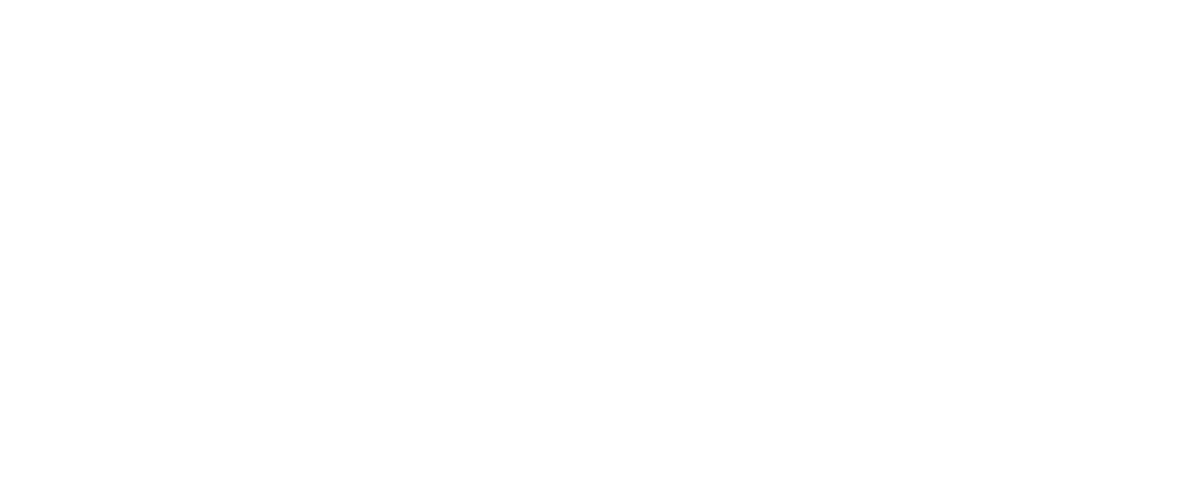

In [47]:
# Create graph for line to go on
plt.figure(figsize=(12,5))

In [48]:
# Plot conflicts
plt.plot(syria_df.Year, syria_df.total_conflict_deaths, label="Conflict Deaths")

In [45]:
# Plot population
plt.plot(syria_df.Year, syria_df.Population, label="Population")

In [49]:

# Plot migration
plt.plot(syria_df.Year, syria_df["Net migration"], label="Net migration")